# Classifying the Type of Dry Beans by Group 99

## Introduction

Beans are an important crop and source of nutrition for people around the world.  Dry beans specifically are dehydrated and used in cooking or planted and used to grow new beans. The dry bean dataset stores data that can be used to tell apart 7 similar bean varieties (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz & Sira). Using this dataset our predictive question is what is the class of an unknown dry bean based on certain attributes? The dataset includes sixteen different measurements in pixels collected using a camera and computer analysis. These include area, perimeter, major axis length (longest length), minor axis length (longest length perpendicular to major axis length), aspect ratio (major vs minor axis length), eccentricity (compares curve of ellipse to the region), convex area (area of smallest polygon bean fits in), equivalent diameter (diameter of circle the same size as bean), extent (ratio of pixels in box around bean compared to bean), solidity (pixels in convex shell vs bean), roundness ((4piA)/(P^2)), and shapeFactors 1-4. Using some of this information we aim to create an accurate and useful predictive model to help tell apart visually similar beans.

## Methods

To conduct an effective data analysis, we will first clean and wrangle the data by selecting only the variables useful for prediction. Of the 16 columns in this dataset, we will choose variables like perimeter since it has a wide data distribution meaning the differences between bean types should be more distinct. Area, convex area, and solidity will be removed because of their narrow distribution which may not be effective for distinguishing different beans. Moreover, shape factors 1-4 might also not be useful for prediction because the metadata is unclear about what they represent.

Since we are predicting bean type, we will use classification as our predictive model. In order to test the accuracy and select the best K value, we need to split the data into training and testing subsets for cross validation. However, the dataset is already split into these subsets on kaggle, therefore, it is not necessary for us to do this. Finally, a suitable and accurate K will be selected for our final prediction of the type of beans.

## Visualization of results

To visualize the results we will produce multiple scatterplots using pairwise combinations of the 9 selected variables. On the plots we will use colour to distinguish bean types and evaluate how useful our plots are.

## Expected Outcomes and Significance

We expect to find how dry bean classification varies with factors relating to size and appearance. This outcome would be quite impactful for people interested in farming/agriculture or perhaps from a culinary perspective, especially since, to the human eye these beans look similar and it is difficult to differentiate between them. After classifying the type of bean we could dig deeper into more comparative questions and rank them by price, popularity or even likeliness of finding them in certain countries/habitats.

## Preliminary Data Analysis

In [3]:
#setup cell

library(tidyverse)#importing tidyverse(basic library)
options(repr.plot.width = 12, repr.plot.height = 30) #sets the width and height of the tables so it's easily viewable
options(repr.matrix.max.rows = 6) #Makes the tables less annoying to look at

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
#reading data for prelim. analysis from the training dataset in the data folder
#The data is in a tidy format already
bean_data_initial<-read_csv("data/bean_training.csv")
bean_data_initial

In [9]:
#We want to see how many beans of each class there are to make sure there are a reasonable amount of all 7
bean_data_table <-bean_data_initial|>
    select(-Area,-ConvexArea,-Solidity,-(ShapeFactor1:ShapeFactor4)) |>
    group_by(Class) |>
    summarize(number_beans = n())
    
bean_data_table

Class,number_beans
<chr>,<int>
BARBUNYA,252
BOMBAY,103
CALI,276
⋮,⋮
HOROZ,361
SEKER,374
SIRA,480


In [10]:
#selecting only relevant columns from the given data to produce plots
bean_data<-bean_data_initial|>
            select(-Area,-ConvexArea,-Solidity,-(ShapeFactor1:ShapeFactor4))|>
        pivot_longer(
        cols=MajorAxisLength:Compactness,
        names_to="factor",
        values_to="values")
bean_data

Perimeter,Class,factor,values
<dbl>,<chr>,<chr>,<dbl>
1052.973,BARBUNYA,MajorAxisLength,389.855771
1052.973,BARBUNYA,MinorAxisLength,228.671466
1052.973,BARBUNYA,AspectRation,1.704873
⋮,⋮,⋮,⋮
894.418,HOROZ,Extent,0.6224254
894.418,HOROZ,roundness,0.7860898
894.418,HOROZ,Compactness,0.7064323


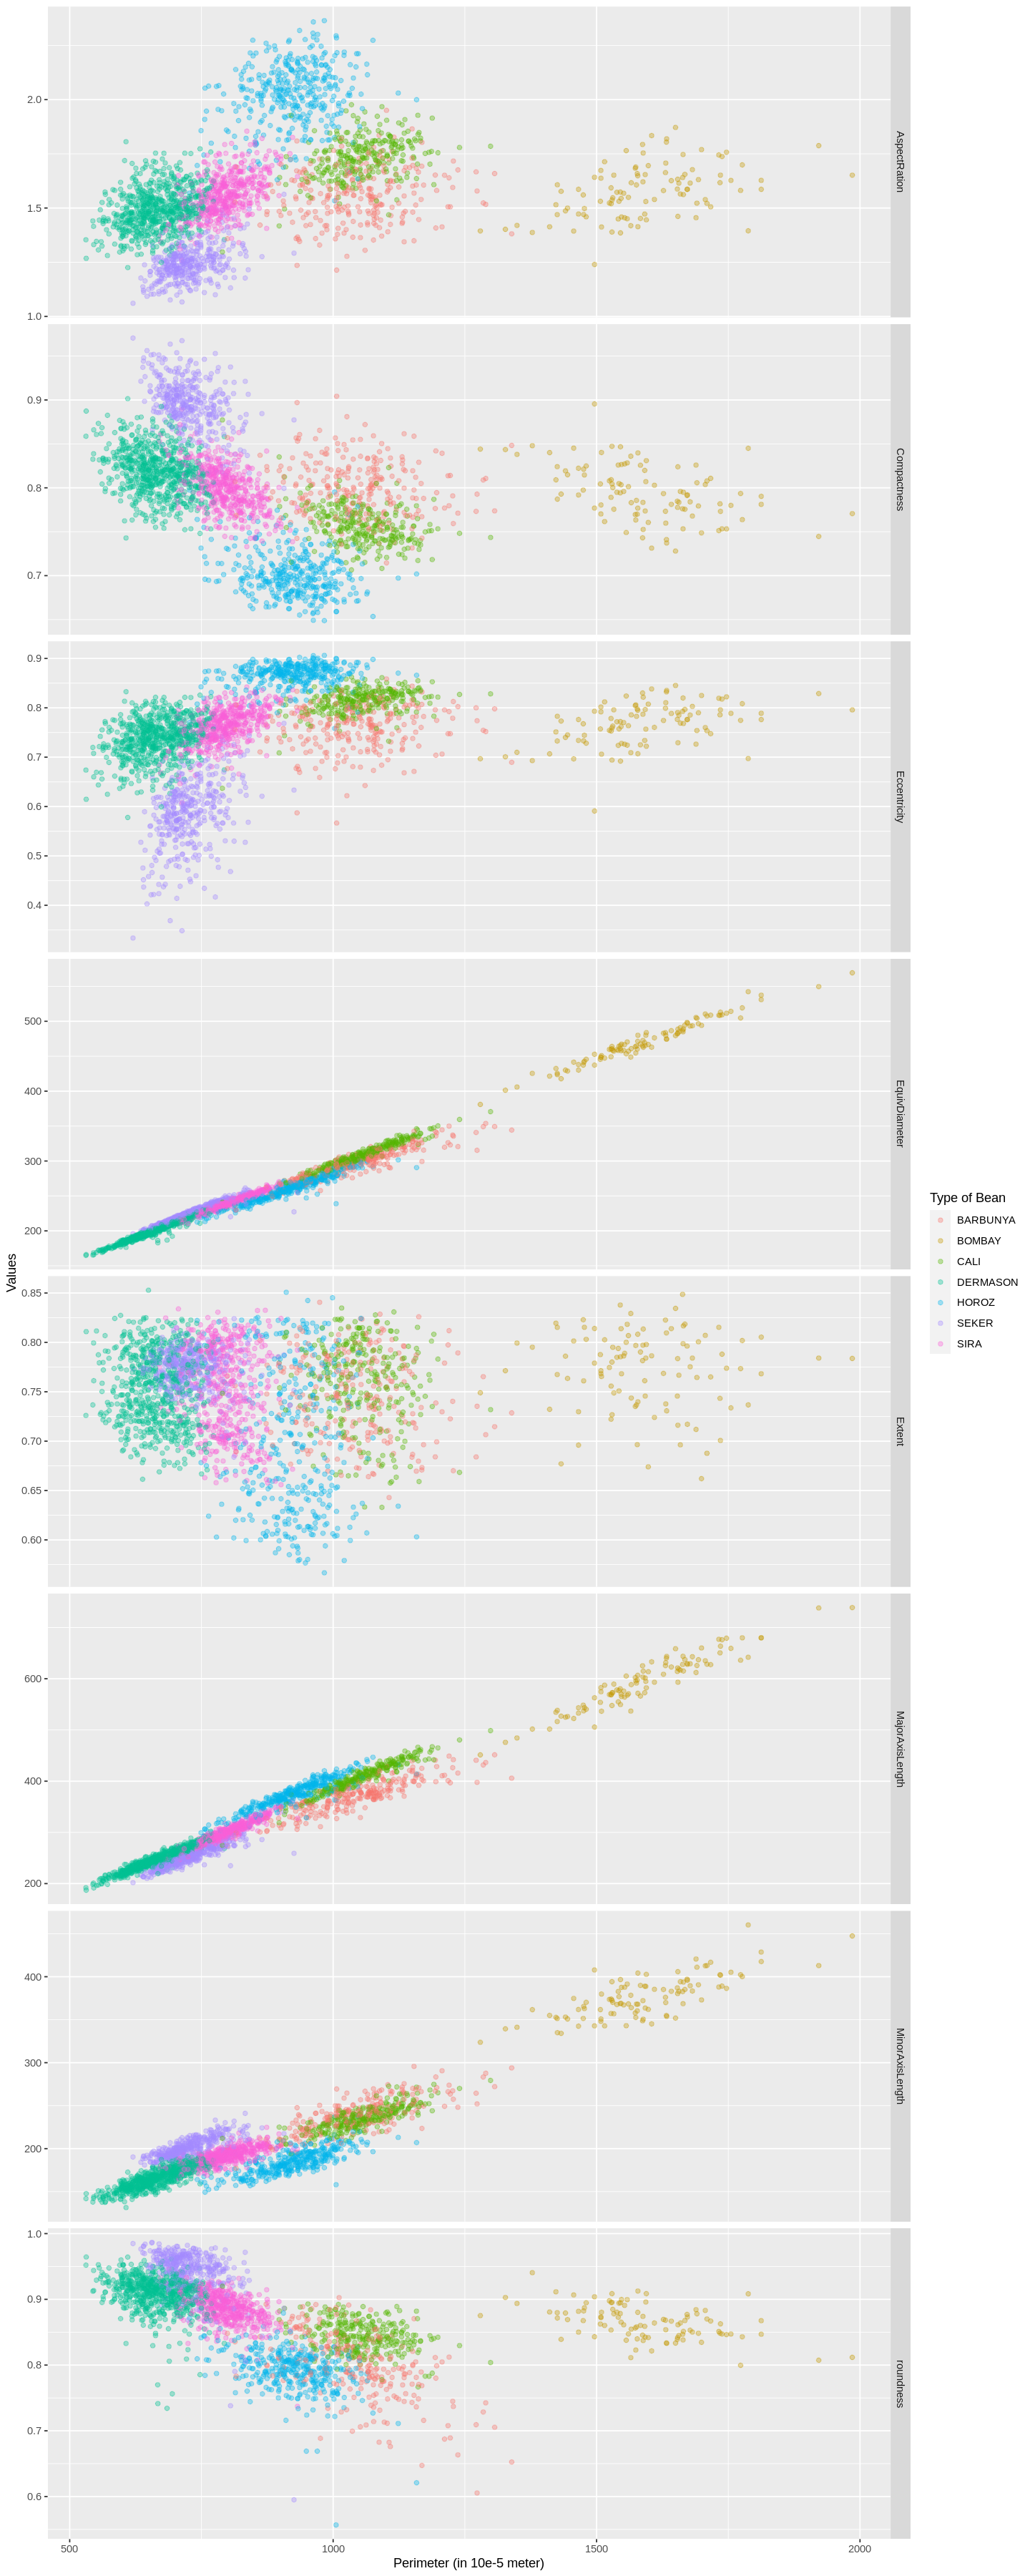

In [8]:
#plotting all variables against perimeter to see how the beans differ
bean_plot<-bean_data|>
    ggplot(aes(x=Perimeter,y=values,color=Class))+
    geom_point(alpha=0.35)+
    facet_grid(factor~.,scales="free")+
    labs(x="Perimeter (in 10e-5 meter)",y="Values",color="Type of Bean")
bean_plot